<a href="https://colab.research.google.com/github/Zee05/JSE-Stock-Market-Returns-Prediction-Using-Multivariate-Time-Series-Data/blob/main/JSE_Stock_Market_Returns_Prediction_Using_Multivariate_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>1.Import Machine Learning Libraries and Data Preprocessing Libraries</h1>

In [ ]:
import io
import math
import numpy as np
np.random.seed(1)
#from tensorflow import set_random_seed
import tensorflow as tf
tf.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential 
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

<h1>2.Data Preprocessing</h1>

**Woolworths Holdings Limited**

In [ ]:
from google.colab import files
uploaded=files.upload()
data2=pd.read_csv(io.BytesIO(uploaded['WHL.JO.csv']),parse_dates=True,index_col=0)
print(data2)

Saving WHL.JO.csv to WHL.JO (4).csv
                   Open         High  ...      Change  Perc Change
Date                                  ...                         
2006-01-02  1352.031860  1352.031860  ...    0.000000     0.000000
2006-01-03  1342.510620  1366.313965  ...    2.366333     0.352087
2006-01-04  1356.792603  1418.681396  ...   26.031677     3.859671
2006-01-05  1399.638672  1419.633545  ...   -6.626465    -0.945983
2006-01-06  1413.920654  1447.245483  ...   25.558350     3.683511
...                 ...          ...  ...         ...          ...
2020-12-18  3640.000000  3769.000000  ...  126.000000     3.486442
2020-12-21  3740.000000  3773.000000  ...  -75.000000    -2.005348
2020-12-22  3673.000000  3900.000000  ...  183.000000     4.993179
2020-12-23  3830.000000  3870.000000  ...  -56.000000    -1.455301
2020-12-24  3792.000000  3835.000000  ...   43.000000     1.133966

[3841 rows x 8 columns]


In [ ]:
df=pd.DataFrame(data2)

In [ ]:
df.head()

,Open,High,Low,Close,Adj.Close,Volume,Change,Perc Change
Date,,,,,,,,
2006-01-02,1352.031860,1352.031860,1352.031860,1352.031860,672.086853,0,0.000000,0.000000
2006-01-03,1342.510620,1366.313965,1342.510620,1356.792603,674.453186,1456987,2.366333,0.352087
2006-01-04,1356.792603,1418.681396,1356.792603,1409.160156,700.484863,1521955,26.031677,3.859671
2006-01-05,1399.638672,1419.633545,1390.117432,1395.830200,693.858398,1304544,-6.626465,-0.945983
2006-01-06,1413.920654,1447.245483,1399.638672,1447.245483,719.416748,1020603,25.558350,3.683511


In [ ]:
pr = pd.DataFrame({'Open': data2['Open'], 'High': data2['High'], 'Low': data2['Low'], 'Close': data2['Close'], 'Adj.Close': data2['Adj.Close']})
pr.head()

,Open,High,Low,Close,Adj.Close
Date,,,,,
2006-01-02,1352.031860,1352.031860,1352.031860,1352.031860,672.086853
2006-01-03,1342.510620,1366.313965,1342.510620,1356.792603,674.453186
2006-01-04,1356.792603,1418.681396,1356.792603,1409.160156,700.484863
2006-01-05,1399.638672,1419.633545,1390.117432,1395.830200,693.858398
2006-01-06,1413.920654,1447.245483,1399.638672,1447.245483,719.416748


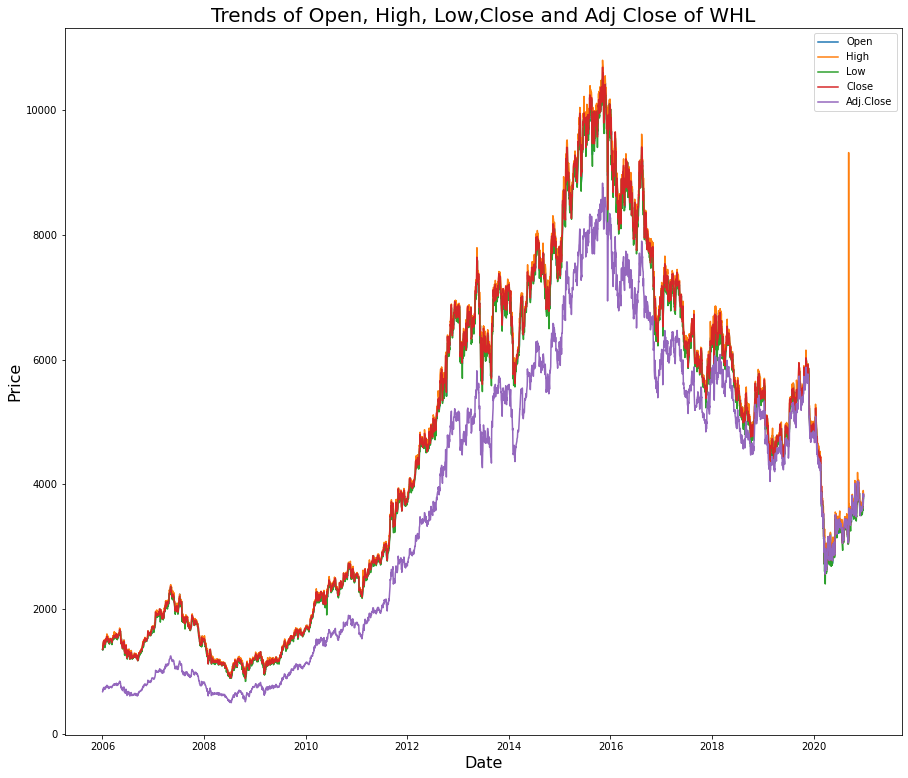

In [ ]:
plt.figure(figsize=(15,13))
plt.ylabel('Price', fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.title("Trends of Open, High, Low,Close and Adj Close of WHL", fontsize=20)
plt.plot(pr)
plt.legend(['Open', 'High','Low','Close','Adj.Close'])
plt.show()

In [ ]:
'''plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Percentage Change in adjusted closing (%) ')

ax = data2.plot(linewidth=2, fontsize=12,figsize=(18,10));
ax.set_xlabel('Date');
ax.legend(fontsize=12);

plt.plot(data2['Close'],label='Close')
plt.plot(data2['Volume'],label='Volume')

plt.plot(df['Perc Change'])
plt.title('Daily Stock returns for Woolworths Holdings Limited ')

plt.show()
'''

"plt.figure(figsize=(12,6))\nplt.grid(True)\nplt.xlabel('Date')\nplt.ylabel('Percentage Change in adjusted closing (%) ')\n\nax = data2.plot(linewidth=2, fontsize=12,figsize=(18,10));\nax.set_xlabel('Date');\nax.legend(fontsize=12);\n\nplt.plot(data2['Close'],label='Close')\nplt.plot(data2['Volume'],label='Volume')\n\nplt.plot(df['Perc Change'])\nplt.title('Daily Stock returns for Woolworths Holdings Limited ')\n\nplt.show()\n"

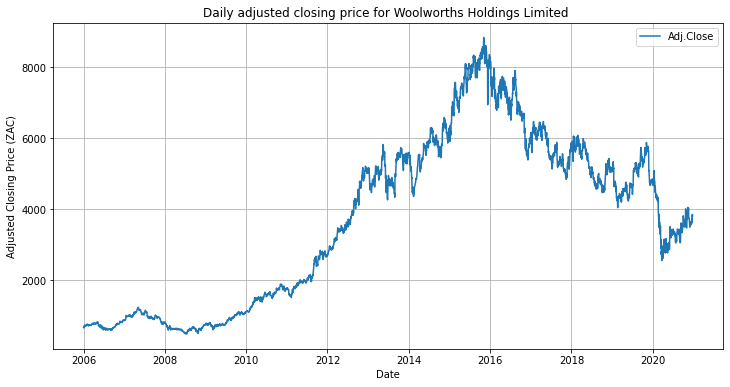

In [ ]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (ZAC)')
plt.plot(data2['Adj.Close'])
plt.legend(['Adj.Close'])
plt.title('Daily adjusted closing price for Woolworths Holdings Limited ')
plt.show()

In [ ]:
data2_perc_change=df['Adj.Close']

**Test For Stationarity using Augmented Dickey Fuller**

**ADF for WHL (Test for Stationarity)**

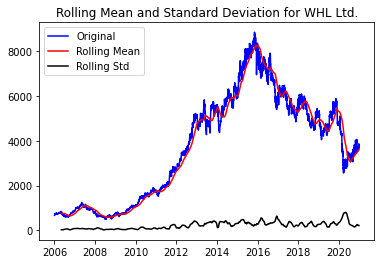


Results of Dickey Fuller Test
Test Statistics                  -1.365417
p-value                           0.598739
No. of lags used                  4.000000
Number of observations used    3836.000000
critical value(1%)               -3.432056
critical value(5%)               -2.862294
critical value(10%)              -2.567171
dtype: float64


In [ ]:
#Test for stationarity
#Determine the rolling statistics 
rolmean2=data2_perc_change.rolling(90).mean()
rolstd2=data2_perc_change.rolling(90).std()

#Plot the rolling statistics 
plt.plot(data2_perc_change,color='blue',label='Original')
plt.plot(rolmean2, color='red',label='Rolling Mean')
plt.plot(rolstd2,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation for WHL Ltd.')
plt.show()
print("")
print("Results of Dickey Fuller Test")
adft2=adfuller(data2_perc_change,autolag='AIC')
output2=pd.Series(adft2[0:4],index=['Test Statistics', 'p-value','No. of lags used','Number of observations used'])
for key,values in adft2[4].items():
  output2['critical value(%s)'%key]=values
print(output2)

In [ ]:
#Data Descritpion
df.describe()

,Open,High,Low,Close,Adj.Close,Volume,Change,Perc Change
count,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3.841000e+03,3841.000000,3841.000000
mean,4595.564089,4658.908845,4528.002233,4594.072866,3714.643479,4.184936e+06,0.823461,0.064529
std,2663.905203,2697.020471,2629.871819,2663.056124,2362.847941,3.206705e+06,82.440432,1.960611
min,904.528381,917.858276,837.878906,884.533630,496.856506,0.000000e+00,-799.624511,-10.303718
25%,1951.877075,1989.962524,1923.313110,1951.877075,1108.894897,2.282397e+06,-25.900055,-1.020062
50%,4690.217773,4755.000000,4623.000000,4683.553223,4137.500488,3.452961e+06,0.000000,0.000000
75%,6700.000000,6785.000000,6611.626953,6695.000000,5550.339355,5.194039e+06,28.666565,1.130929
max,10601.000000,10800.000000,10505.000000,10688.000000,8828.900391,6.035719e+07,950.792480,13.700757


<h1>3.Feature Extraction, Feature Selection and Feature Engineering</h1>

<h2>This involve:</h2>
<h3>1.Checking Null values , removing null values</h3>
<h3>2.Use autocorrelation to select the highest correlated feature with   Adjusted Closing price</h3>


In [ ]:
#showing column wise %ge of NaN values they contains 
for i in df.columns:
  print(i,"\t-\t",df[i].isna().mean()*100)

Open 	-	 0.0
High 	-	 0.0
Low 	-	 0.0
Close 	-	 0.0
Adj.Close 	-	 0.0
Volume 	-	 0.0
Change 	-	 0.0
Perc Change 	-	 0.0


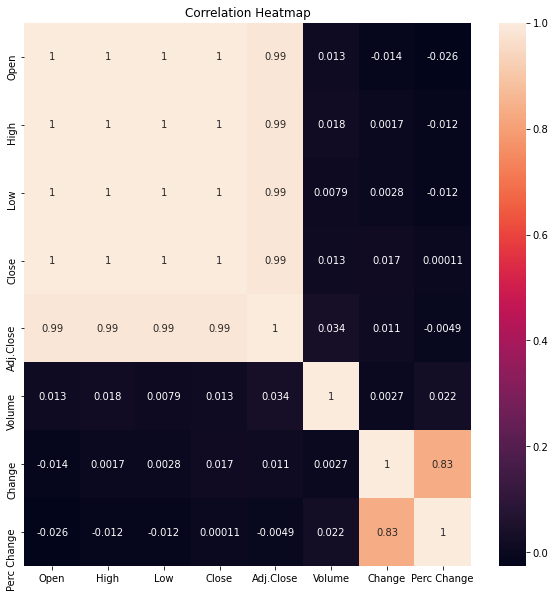

In [ ]:
#Since there are no nullvalues, we can move further
#Graphical representation of correlation matrix
#representing correlation between different variables 
#The value of correlation can take any values from -1 to 1.
cormap =df.corr()
fig,ax=plt.subplots(figsize=(10,10))
plt.title("Correlation Heatmap")
sns.heatmap(cormap,annot=True)

In [ ]:
# List of considered Features
FEATURES = ['High', 'Low', 'Open', 'Close', 'Volume','Adj.Close'
            #, 'Month', 'Year', 'Adj Close'
           ]

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Adj.Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['High', 'Low', 'Open', 'Close', 'Volume', 'Adj.Close']


,High,Low,Open,Close,Volume,Adj.Close,Prediction
Date,,,,,,,
2020-12-18,3769.0,3591.0,3640.0,3740.0,5030114,3740.0,3740.0
2020-12-21,3773.0,3585.0,3740.0,3665.0,2180564,3665.0,3665.0
2020-12-22,3900.0,3685.0,3673.0,3848.0,4259491,3848.0,3848.0
2020-12-23,3870.0,3763.0,3830.0,3792.0,1567506,3792.0,3792.0
2020-12-24,3835.0,3767.0,3792.0,3835.0,812492,3835.0,3835.0


<h2>3.1 Scaling the data</h2>

In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Adj.Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(3841, 6)


<h2>3.2 Split the data into 80% training and 20% testing</h2>

In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("Adj.Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(3023, 50, 6) (3023,)
(768, 50, 6) (768,)
0.02220791038522057
0.02220791038522057


<h1> 4.Building the model</h1>
<h3>This is the stage where we will build the three models, LSTM-RNN, Multilayer Perceptron(NN) and Random Forest</h3>

<h2>4.1 LSTM-RNN Model</h2>

<h3>4.1.1  Building the model</h3>

In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

300 50 6


<h3>4.1.2 Trining the LSTM Model</h3>

In [ ]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/50
189/189 [==============================] - 67s 338ms/step - loss: 0.0057 - val_loss: 7.2367e-04
Epoch 2/50
189/189 [==============================] - 66s 348ms/step - loss: 4.1194e-04 - val_loss: 3.7350e-04
Epoch 3/50
189/189 [==============================] - 67s 356ms/step - loss: 4.1034e-04 - val_loss: 3.3122e-04
Epoch 4/50
189/189 [==============================] - 66s 350ms/step - loss: 3.3321e-04 - val_loss: 3.2389e-04
Epoch 5/50
189/189 [==============================] - 67s 355ms/step - loss: 4.9209e-04 - val_loss: 4.8784e-04
Epoch 6/50
189/189 [==============================] - 67s 354ms/step - loss: 3.0234e-04 - val_loss: 2.4711e-04
Epoch 7/50
189/189 [==============================] - 67s 354ms/step - loss: 3.2960e-04 - val_loss: 3.1757e-04
Epoch 8/50
189/189 [==============================] - 67s 357ms/step - loss: 2.9287e-04 - val_loss: 3.1376e-04
Epoch 9/50
189/189 [==============================] - 67s 353ms/step - loss: 2.2968e-04 - val_loss: 2.1949e-04
Epoch

<h3>4.1.3 Plot the Validation Loss and Loss function of LSTM</h3>

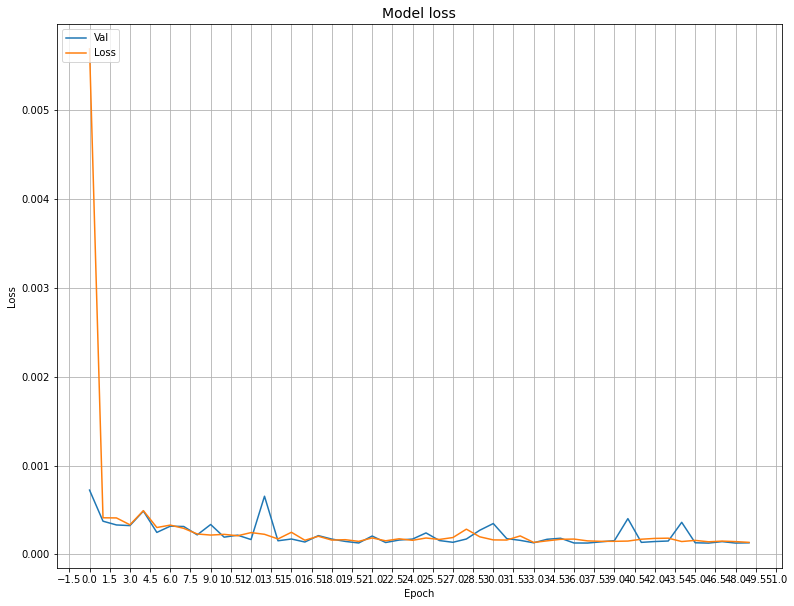

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(13, 10), sharex=True)
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.title("Model loss",fontsize=14)
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Val", "Loss"], loc="upper left")
plt.grid()
plt.show()


<h1>5.Prediction for the models</h1>

In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 70.2
Mean Absolute Percentage Error (MAPE): 1.99 %
Median Absolute Percentage Error (MDAPE): 1.43 %


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_scaled.flatten()})
pred_df.head()

,Actual,Predicted
0,0.513641,0.506691
1,0.515478,0.515865
2,0.530166,0.515942
3,0.524760,0.530077
4,0.504155,0.525614


In [ ]:
# Measure the Accuracy Score
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_scaled)))
Acc.append(r2_score(y_test, y_pred_scaled))

Accuracy score of the predictions: 0.9887901449184359


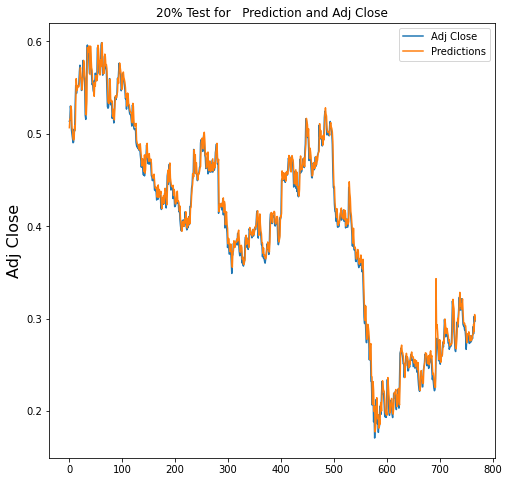

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Adj Close', fontsize=16)
plt.title("20% Test for   Prediction and Adj Close")
plt.plot(pred_df)
plt.legend(['Adj Close', 'Predictions'])
plt.show()